In [1]:
from threeML import *
from threeML.analysis_results import *
import astropy.io.fits as fits
import astropy.units as u
import numpy as np

[WARNING ] The naima package is not available. Models that depend on it will not be available
[WARNING ] The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it will not be available.
[WARNING ] The ebltable package is not available. Models that depend on it will not be available
[INFO    ] Starting 3ML!
[WARNING ] no display variable set. using backend for graphics without display (agg)
[WARNING ] ROOT minimizer not available
[WARNING ] Multinest minimizer not available
[WARNING ] PyGMO is not available
[WARNING ] The cthreeML package is not installed. You will not be able to use plugins which require the C/C++ interface (currently HAWC)
[WARNING ] Could not import plugin FermiLATLike.py. Do you have the relative instrument software installed and configured?
[WARNING ] Could not import plugin HAWCLike.py. Do you have the relative instrument software installed and configured?
[WARNING ] No fermitools installed
[WARNING ] Env. variable OMP_NUM_THREADS is not set.

In [2]:
silence_logs()
from tqdm.auto import tqdm
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
import matplotlib.pyplot as plt

set_threeML_style()

In [3]:
np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [4]:
rev = ['43-53','54-123','124-203', '204-512', '513-635', '636-751', '752-804', '805-837', '838-870','871-994','995-1020','1021-1025','1026-1058','1059-1092','1093-1217','1218-1302','1303-1491','1492-1621','1622-1861','1862-1872','1873-2010']

rev_mean_list = []
rev_mean_err_list = []


MJD = []
MJD_err = []
IJD = []
IJD_err = []


flux24_50 = []
flux24_50_err_low = []
flux24_50_err_up = []

flux50_150  = []
flux50_150_err_low = []
flux50_150_err_up = []

flux150_400 = []
flux150_400_err_low = []
flux150_400_err_up = []

flux400_650 = []
flux400_650_err_low = []
flux400_650_err_up = []

flux650_2000 = []
flux650_2000_err_low = []
flux650_2000_err_up = []

flux2000_8000 = []
flux2000_8000_err_low = []
flux2000_8000_err_up = []


flux1 = load_analysis_results("3ml_Crab_Parameters_SE_24-600keV_rev43-53.fits").get_point_source_flux(20 * u.keV, 40 * u.keV) #for units on ylabel only

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

In [5]:
for i in range(len(rev)):
    rev_single = str(rev[i]).partition('-')

    print(rev_single[0])
    print(rev_single[2])

    rev_mean = (int(rev_single[0])+int(rev_single[2]))/2
    print(rev_mean)
    rev_mean_err = (int(rev_single[2])-int(rev_single[0]))/2
    print(rev_mean_err)
    rev_mean_list.append(rev_mean)
    rev_mean_err_list.append(rev_mean_err)
    
#print(rev_mean_list)
#print(rev_mean_err_list)

43
53
48.0
5.0
54
123
88.5
34.5
124
203
163.5
39.5
204
512
358.0
154.0
513
635
574.0
61.0
636
751
693.5
57.5
752
804
778.0
26.0
805
837
821.0
16.0
838
870
854.0
16.0
871
994
932.5
61.5
995
1020
1007.5
12.5
1021
1025
1023.0
2.0
1026
1058
1042.0
16.0
1059
1092
1075.5
16.5
1093
1217
1155.0
62.0
1218
1302
1260.0
42.0
1303
1491
1397.0
94.0
1492
1621
1556.5
64.5
1622
1861
1741.5
119.5
1862
1872
1867.0
5.0
1873
2010
1941.5
68.5


In [6]:
#####################
# IMPORT DATASETS #
#####################

def import_fits_combined(rev):
    ar = load_analysis_results("3ml_Crab_Parameters_combined_24-8000keV_rev" + str(rev) + ".fits")
    

    flux_24_50 = ar.get_point_source_flux(24 * u.keV, 50 * u.keV, flux_unit='1 / (cm**2 s)' ) 
    flux_50_150 = ar.get_point_source_flux(50 * u.keV, 150 * u.keV, flux_unit='1 / (cm**2 s )')
    flux_150_400 = ar.get_point_source_flux(150 * u.keV, 400 * u.keV, flux_unit='1 / (cm**2 s)')
    flux_400_650 = ar.get_point_source_flux(400 * u.keV, 650 * u.keV, flux_unit='1 / (cm**2 s)')
    flux_650_2000 = ar.get_point_source_flux(650 * u.keV, 2000 * u.keV, flux_unit='1 / (cm**2 s)')
    flux_2000_8000 = ar.get_point_source_flux(2000 * u.keV, 8000 * u.keV, flux_unit='1 / (cm**2 s)')

    
    flux24_50.append(flux_24_50.flux[0].value/26)
    flux24_50_err_low.append((flux_24_50.flux[0].value - flux_24_50.min().min().value)/26)
    flux24_50_err_up.append((flux_24_50.max().max().value - flux_24_50.flux[0].value)/26)
    
    flux50_150.append(flux_50_150.flux[0].value/100)
    flux50_150_err_low.append((flux_50_150.flux[0].value - flux_50_150.min().min().value)/100)
    flux50_150_err_up.append((flux_50_150.max().max().value - flux_50_150.flux[0].value)/100)
    
    flux150_400.append(flux_150_400.flux[0].value/250)
    flux150_400_err_low.append((flux_150_400.flux[0].value - flux_150_400.min().min().value)/250)
    flux150_400_err_up.append((flux_150_400.max().max().value - flux_150_400.flux[0].value)/250)
    
    flux400_650.append(flux_400_650.flux[0].value/250)
    flux400_650_err_low.append((flux_400_650.flux[0].value - flux_400_650.min().min().value)/250)
    flux400_650_err_up.append((flux_400_650.max().max().value - flux_400_650.flux[0].value)/250)

    flux650_2000.append(flux_650_2000.flux[0].value/1350)
    flux650_2000_err_low.append((flux_650_2000.flux[0].value - flux_650_2000.min().min().value)/1350)
    flux650_2000_err_up.append((flux_650_2000.max().max().value - flux_650_2000.flux[0].value)/1350)
    
    flux2000_8000.append(flux_2000_8000.flux[0].value/6000)
    flux2000_8000_err_low.append((flux_2000_8000.flux[0].value - flux_2000_8000.min().min().value)/6000)
    flux2000_8000_err_up.append((flux_2000_8000.max().max().value - flux_2000_8000.flux[0].value)/6000)

    print("Revolution " + str(rev) + " finished!")


In [7]:
#t = fits.open("../cookbook_dataset_02_0020-0600keV_SE_rev54-123/scw.fits.gz")
#t.info()
#print(t[1].columns)
#Revo = t[1].data['Revolution']
#print(Revo)
#TSTART = t[1].data['TSTART']
#print(TSTART)
#TEND = t[1].data['TEND']
#print(TEND)
#print(TSTART.mean())
#print(TEND.mean())
#print(((TSTART+TEND)/2).mean())
#ScwID = t[1].data['ScwID']
#print(ScwID)
#DateStart = t[1].data['DateStart']
#print(DateStart)

In [8]:
#print(TSTART)
#print(TSTART[0])
#print(TEND)
#print(TEND[-1])
#TERR = (TEND[-1] - TSTART[0])/2
#print(TERR)

In [9]:
#############################
# Turn Revolutions into Days #
##############################
def get_days(rev):

    times_rev = fits.open("../cookbook_dataset_02_0020-0600keV_SE_rev" + str(rev) + "/scw.fits.gz")
    TEND = times_rev[1].data['TEND']
    TSTART = times_rev[1].data['TSTART']
    TMEAN = ((TSTART+TEND)/2).mean()
    TERR = (TEND[-1] - TSTART[0])/2
    
    IJD.append(TMEAN)
    MJD.append(TMEAN + 51544)
    IJD_err.append(TERR)
    MJD_err.append(TERR)

In [10]:
for i in range(len(rev)):
    import_fits_combined(rev[i])
    get_days(rev[i])
    
print(IJD)
print(MJD)
print(IJD_err)
print(MJD_err)
    

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 43-53 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 54-123 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 124-203 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 204-512 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 513-635 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 636-751 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 752-804 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 805-837 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 838-870 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 871-994 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 995-1020 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1021-1025 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1026-1058 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1059-1092 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1093-1217 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1218-1302 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1303-1491 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1492-1621 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1622-1861 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1862-1872 finished!


processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

processing MLE analyses:   0%|                                                        | 0/1 [00:00<?, ?it/s]

Revolution 1873-2010 finished!
[1149.656065320728, 1314.5132613830488, 1463.9511843525943, 2059.0601958584325, 2726.9922097249128, 3084.2219426766464, 3332.6569301347126, 3513.7060426210855, 3527.2613991807984, 3835.611340210869, 4065.819837893376, 4075.9664649450924, 4090.2521148095875, 4275.269657309072, 4415.131794165311, 4757.574070488551, 5215.926706848293, 5661.28752001995, 6164.763304977053, 6479.335870465134, 6729.124570011129]
[52693.65606532073, 52858.51326138305, 53007.9511843526, 53603.06019585843, 54270.992209724915, 54628.221942676646, 54876.65693013471, 55057.70604262109, 55071.261399180796, 55379.61134021087, 55609.819837893374, 55619.96646494509, 55634.252114809584, 55819.26965730907, 55959.13179416531, 56301.574070488554, 56759.926706848295, 57205.28752001995, 57708.76330497705, 58023.33587046513, 58273.12457001113]
[12.358484294660002, 101.87918565836992, 87.36392539287999, 386.9075973240649, 97.00056421471982, 99.88148684111002, 1.2268470481499207, 3.272293654059922

In [11]:
asflux24_50_err = np.array(list(zip(flux24_50_err_low, flux24_50_err_up))).T
asflux50_150_err = np.array(list(zip(flux50_150_err_low, flux50_150_err_up))).T
asflux150_400_err = np.array(list(zip(flux150_400_err_low, flux150_400_err_up))).T
asflux400_650_err = np.array(list(zip(flux400_650_err_low, flux400_650_err_up))).T
asflux650_2000_err = np.array(list(zip(flux650_2000_err_low, flux650_2000_err_up))).T
asflux2000_8000_err = np.array(list(zip(flux2000_8000_err_low, flux2000_8000_err_up))).T

# OLD PLOTS

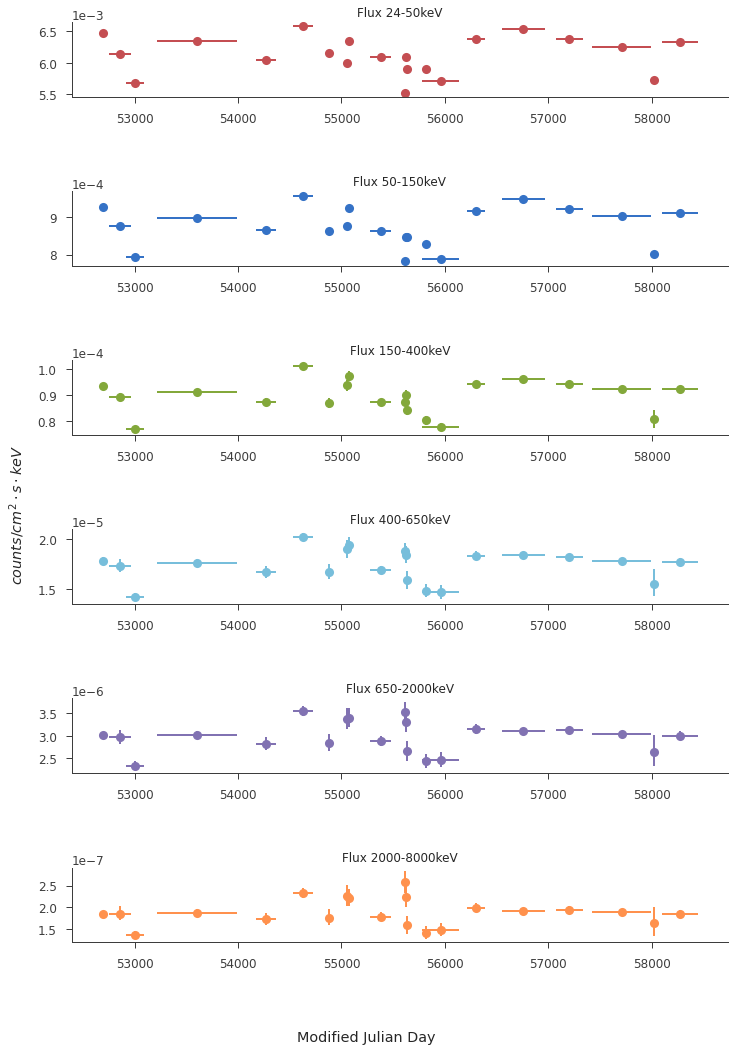

In [12]:
#####################
# PLOT DATA #
#####################


fig, axis = plt.subplots(6)


axis[0].errorbar(MJD, flux24_50, xerr=MJD_err, yerr = asflux24_50_err, fmt = 'ro',  label = r'Flux 24-50keV')
axis[1].errorbar(MJD, flux50_150, xerr=MJD_err, yerr = asflux50_150_err, fmt = 'bo',  label = r'Flux 50-150keV')
axis[2].errorbar(MJD, flux150_400, xerr=MJD_err, yerr = asflux150_400_err, fmt = 'go',  label = r'Flux 150-400keV')
axis[3].errorbar(MJD, flux400_650, xerr=MJD_err, yerr = asflux400_650_err, fmt = 'co',  label = r'Flux 400-650keV')
axis[4].errorbar(MJD, flux650_2000, xerr=MJD_err, yerr = asflux650_2000_err, fmt = 'mo',  label = r'Flux 650-2000keV')
axis[5].errorbar(MJD, flux2000_8000, xerr=MJD_err, yerr = asflux2000_8000_err, fmt = 'yo',  label = r'Flux 2000-8000keV')


axis[0].set_title('Flux 24-50keV')
axis[1].set_title('Flux 50-150keV')
axis[2].set_title('Flux 150-400keV')
axis[3].set_title('Flux 400-650keV')
axis[4].set_title('Flux 650-2000keV')
axis[5].set_title('Flux 2000-8000keV')


fig.supxlabel(r'Modified Julian Day')
fig.supylabel(r'${counts}/{cm^2 \cdot s \cdot keV}$')

axis[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axis[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axis[2].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axis[3].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axis[4].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axis[5].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

fig.tight_layout()
fig.set_figheight(15)

fig.show()
plt.savefig('3ml_Parameter_combined_Flux_Toulouse_SepRev_MJD.pdf')




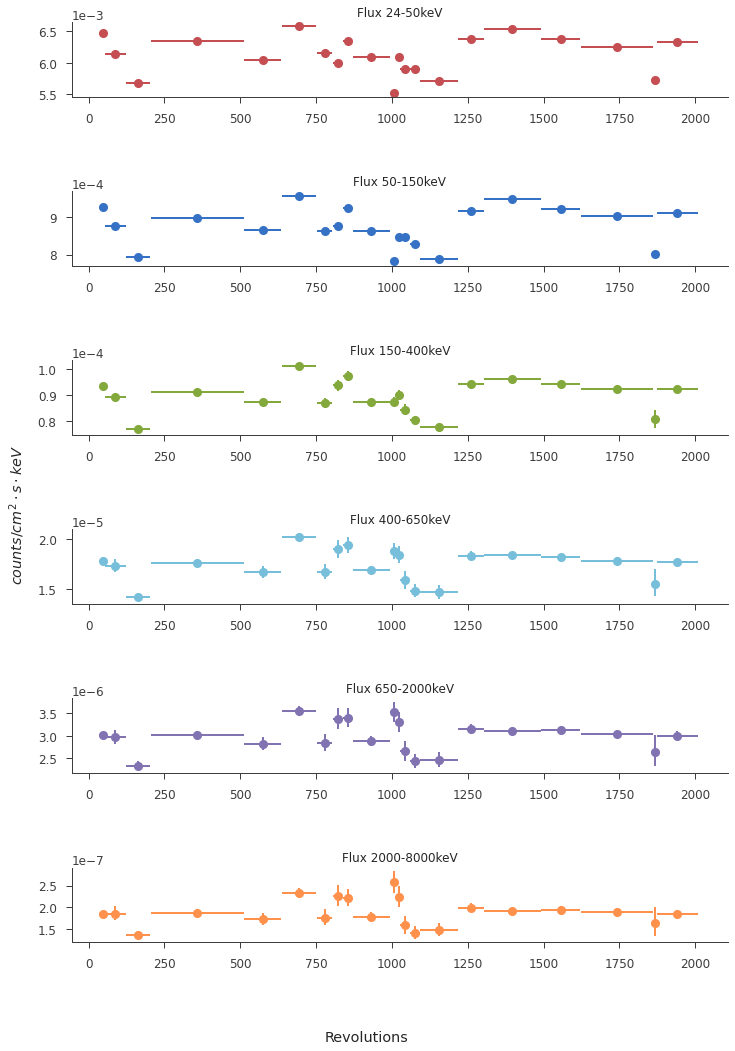

In [13]:
fig, axis = plt.subplots(6)


axis[0].errorbar(rev_mean_list, flux24_50, xerr=rev_mean_err_list, yerr = asflux24_50_err, fmt = 'ro',  label = r'Flux 24-50keV')
axis[1].errorbar(rev_mean_list, flux50_150, xerr=rev_mean_err_list, yerr = asflux50_150_err, fmt = 'bo',  label = r'Flux 50-150keV')
axis[2].errorbar(rev_mean_list, flux150_400, xerr=rev_mean_err_list, yerr = asflux150_400_err, fmt = 'go',  label = r'Flux 150-400keV')
axis[3].errorbar(rev_mean_list, flux400_650, xerr=rev_mean_err_list, yerr = asflux400_650_err, fmt = 'co',  label = r'Flux 400-650keV')
axis[4].errorbar(rev_mean_list, flux650_2000, xerr=rev_mean_err_list, yerr = asflux650_2000_err, fmt = 'mo',  label = r'Flux 650-2000keV')
axis[5].errorbar(rev_mean_list, flux2000_8000, xerr=rev_mean_err_list, yerr = asflux2000_8000_err, fmt = 'yo',  label = r'Flux 2000-8000keV')


axis[0].set_title('Flux 24-50keV')
axis[1].set_title('Flux 50-150keV')
axis[2].set_title('Flux 150-400keV')
axis[3].set_title('Flux 400-650keV')
axis[4].set_title('Flux 650-2000keV')
axis[5].set_title('Flux 2000-8000keV')


fig.supxlabel(r'Revolutions')
fig.supylabel(r'${counts}/{cm^2 \cdot s \cdot keV}$')

axis[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axis[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axis[2].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axis[3].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axis[4].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axis[5].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

fig.tight_layout()
fig.set_figheight(15)

fig.show()
plt.savefig('3ml_Parameter_combined_Flux_Toulouse_SepRev_Rev.pdf')

# BA PLOTS

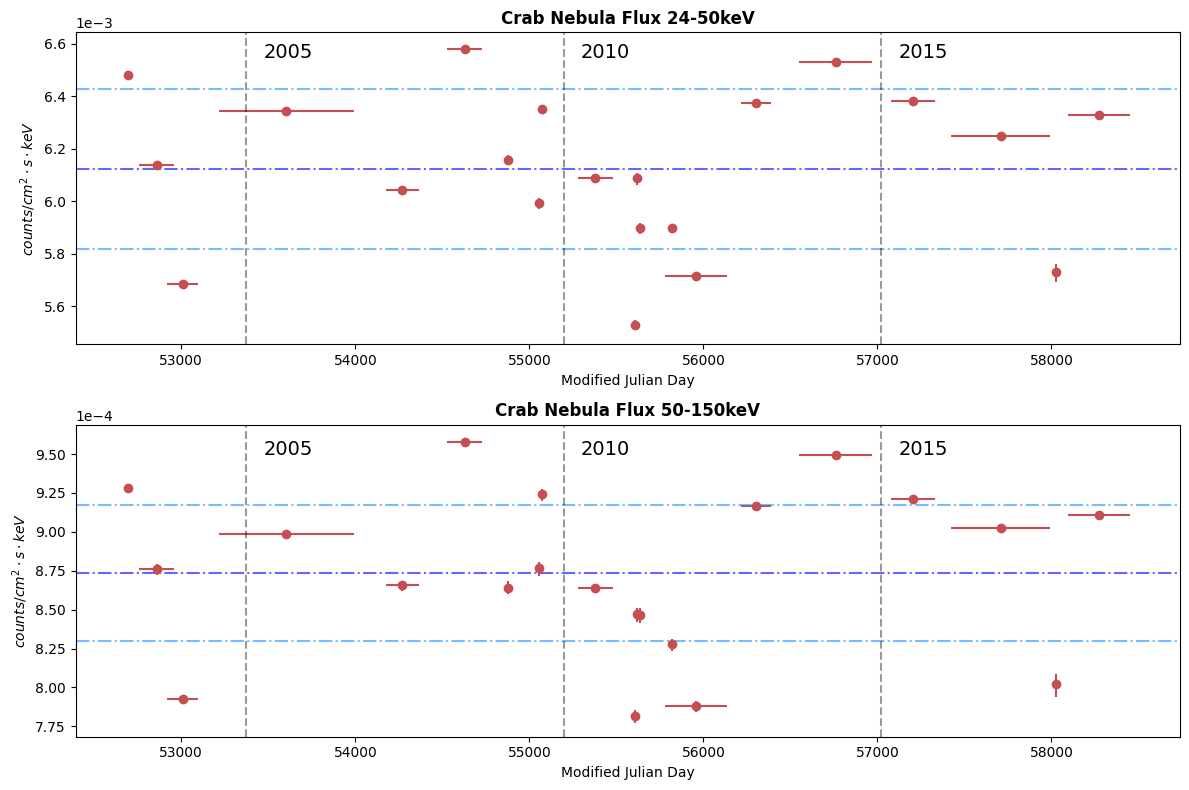

In [14]:
plt.style.use('default')

fig, axis = plt.subplots(2, figsize = (12,8))


axis[0].errorbar(MJD, flux24_50, xerr=MJD_err, yerr = asflux24_50_err, fmt = 'ro',  label = r'Crab Nebula Flux 24-50keV')
axis[1].errorbar(MJD, flux50_150, xerr=MJD_err, yerr = asflux50_150_err, fmt = 'ro',  label = r'Crab Nebula Flux 50-150keV')


axis[0].set_title('Crab Nebula Flux 24-50keV', weight = 'bold')
axis[1].set_title('Crab Nebula Flux 50-150keV', weight = 'bold')


axis[0].set_xlabel(r'Modified Julian Day')
axis[0].set_ylabel(r'${counts}/{cm^2 \cdot s \cdot keV}$')

axis[1].set_xlabel(r'Modified Julian Day')
axis[1].set_ylabel(r'${counts}/{cm^2 \cdot s \cdot keV}$')


axis[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axis[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

axis[0].axhline(np.mean(flux24_50), color = 'blue', ls = '-.', alpha = 0.6, label = 'Average Flux')
axis[0].axhline(np.mean(flux24_50)*0.95, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '-5% Average Flux')
axis[0].axhline(np.mean(flux24_50)*1.05, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '+5% Average Flux')


axis[0].axvline(53371, color = 'black', ls = '--', alpha = 0.4, label = '2005')
axis[0].text(53371+100, axis[0].get_ylim()[1]*0.985, '2005', fontsize = 14)
axis[0].axvline(55197, color = 'black', ls = '--', alpha = 0.4, label = '2010')
axis[0].text(55197+100, axis[0].get_ylim()[1]*0.985, '2010', fontsize = 14)
axis[0].axvline(57023, color = 'black', ls = '--', alpha = 0.4, label = '2015')
axis[0].text(57023+100, axis[0].get_ylim()[1]*0.985, '2015', fontsize = 14)


axis[1].axhline(np.mean(flux50_150), color = 'blue', ls = '-.', alpha = 0.6, label = 'Average Flux')
axis[1].axhline(np.mean(flux50_150)*0.95, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '-5% Average Flux')
axis[1].axhline(np.mean(flux50_150)*1.05, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '+5% Average Flux')

axis[1].axvline(53371, color = 'black', ls = '--', alpha = 0.4, label = '2005')
axis[1].text(53371+100, axis[1].get_ylim()[1]*0.98, '2005', fontsize = 14)
axis[1].axvline(55197, color = 'black', ls = '--', alpha = 0.4, label = '2010')
axis[1].text(55197+100, axis[1].get_ylim()[1]*0.98, '2010', fontsize = 14)
axis[1].axvline(57023, color = 'black', ls = '--', alpha = 0.4, label = '2015')
axis[1].text(57023+100, axis[1].get_ylim()[1]*0.98, '2015', fontsize = 14)

fig.tight_layout()

fig.show()
plt.savefig('3ml_Parameter_combined_Flux24-150keV_Toulouse_SepRev_MJD.pdf')

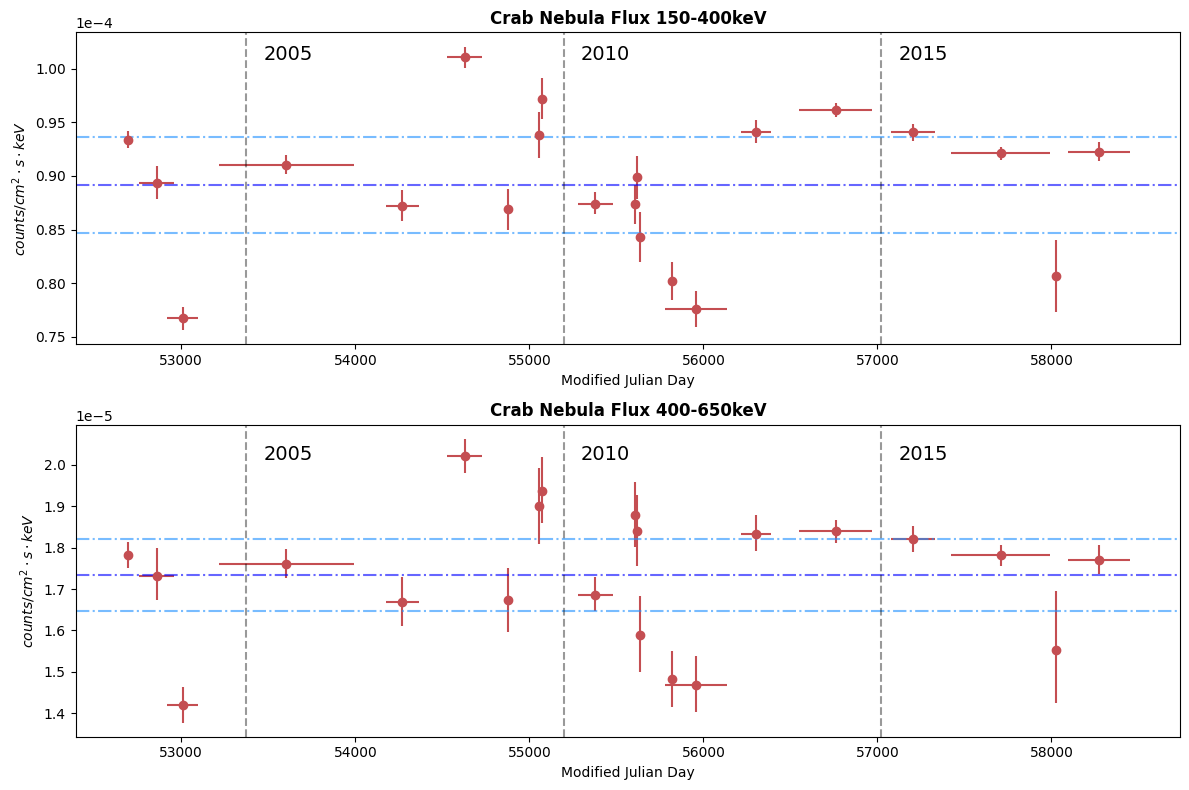

In [15]:
plt.style.use('default')

fig, axis = plt.subplots(2, figsize = (12,8))


axis[0].errorbar(MJD, flux150_400, xerr=MJD_err, yerr = asflux150_400_err, fmt = 'ro',  label = r'Crab Nebula Flux 150-400keV')
axis[1].errorbar(MJD, flux400_650, xerr=MJD_err, yerr = asflux400_650_err, fmt = 'ro',  label = r'Crab Nebula Flux 400-650keV')


axis[0].set_title('Crab Nebula Flux 150-400keV', weight = 'bold')
axis[1].set_title('Crab Nebula Flux 400-650keV', weight = 'bold')


axis[0].set_xlabel(r'Modified Julian Day')
axis[0].set_ylabel(r'${counts}/{cm^2 \cdot s \cdot keV}$')

axis[1].set_xlabel(r'Modified Julian Day')
axis[1].set_ylabel(r'${counts}/{cm^2 \cdot s \cdot keV}$')

axis[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axis[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))


axis[0].axhline(np.mean(flux150_400), color = 'blue', ls = '-.', alpha = 0.6, label = 'Average Flux')
axis[0].axhline(np.mean(flux150_400)*0.95, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '-5% Average Flux')
axis[0].axhline(np.mean(flux150_400)*1.05, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '+5% Average Flux')


axis[0].axvline(53371, color = 'black', ls = '--', alpha = 0.4, label = '2005')
axis[0].text(53371+100, axis[0].get_ylim()[1]*0.975, '2005', fontsize = 14)
axis[0].axvline(55197, color = 'black', ls = '--', alpha = 0.4, label = '2010')
axis[0].text(55197+100, axis[0].get_ylim()[1]*0.975, '2010', fontsize = 14)
axis[0].axvline(57023, color = 'black', ls = '--', alpha = 0.4, label = '2015')
axis[0].text(57023+100, axis[0].get_ylim()[1]*0.975, '2015', fontsize = 14)


axis[1].axhline(np.mean(flux400_650), color = 'blue', ls = '-.', alpha = 0.6, label = 'Average Flux')
axis[1].axhline(np.mean(flux400_650)*0.95, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '-5% Average Flux')
axis[1].axhline(np.mean(flux400_650)*1.05, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '+5% Average Flux')

axis[1].axvline(53371, color = 'black', ls = '--', alpha = 0.4, label = '2005')
axis[1].text(53371+100, axis[1].get_ylim()[1]*0.96, '2005', fontsize = 14)
axis[1].axvline(55197, color = 'black', ls = '--', alpha = 0.4, label = '2010')
axis[1].text(55197+100, axis[1].get_ylim()[1]*0.96, '2010', fontsize = 14)
axis[1].axvline(57023, color = 'black', ls = '--', alpha = 0.4, label = '2015')
axis[1].text(57023+100, axis[1].get_ylim()[1]*0.96, '2015', fontsize = 14)

fig.tight_layout()

fig.show()
plt.savefig('3ml_Parameter_combined_Flux150-650keV_Toulouse_SepRev_MJD.pdf')

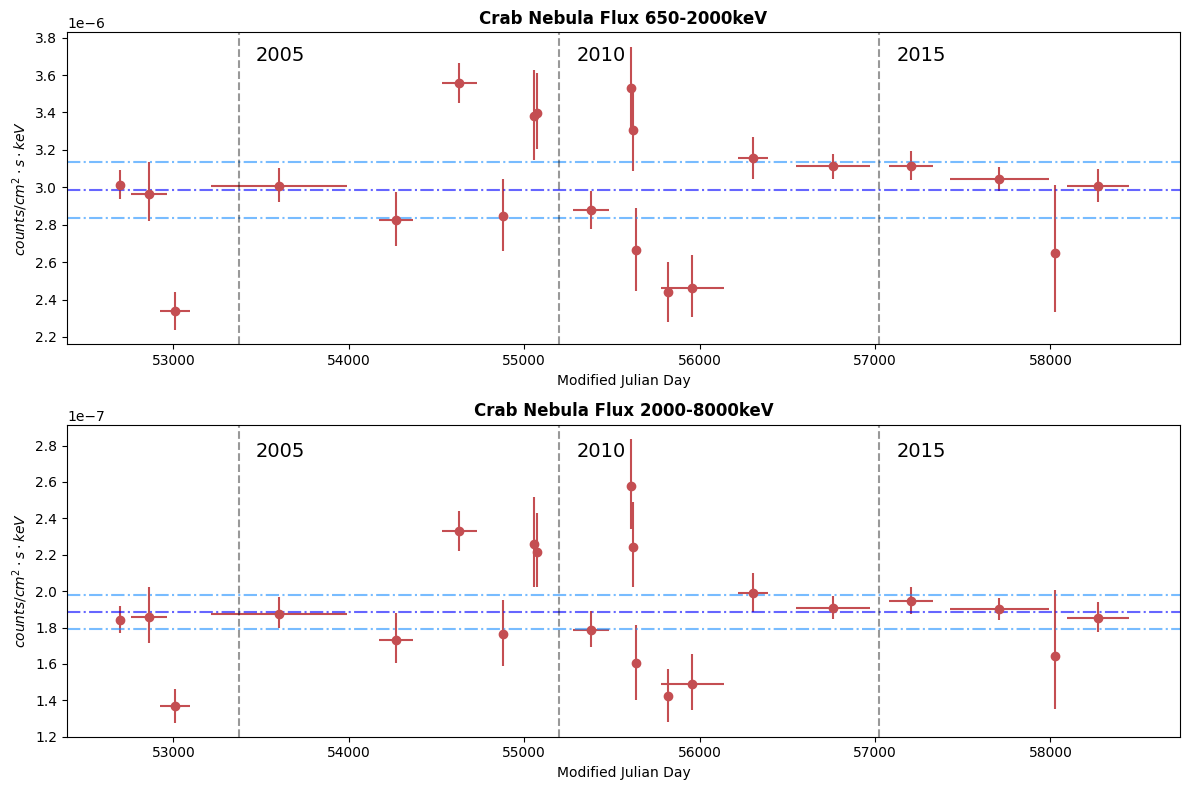

In [16]:
plt.style.use('default')

fig, axis = plt.subplots(2, figsize = (12,8))


axis[0].errorbar(MJD, flux650_2000, xerr=MJD_err, yerr = asflux650_2000_err, fmt = 'ro',  label = r'Crab Nebula Flux 650-2000keV')
axis[1].errorbar(MJD, flux2000_8000, xerr=MJD_err, yerr = asflux2000_8000_err, fmt = 'ro',  label = r'Crab Nebula Flux 2000-8000keV')

axis[0].set_title('Crab Nebula Flux 650-2000keV', weight = 'bold')
axis[1].set_title('Crab Nebula Flux 2000-8000keV', weight = 'bold')


axis[0].set_xlabel(r'Modified Julian Day')
axis[0].set_ylabel(r'${counts}/{cm^2 \cdot s \cdot keV}$')

axis[1].set_xlabel(r'Modified Julian Day')
axis[1].set_ylabel(r'${counts}/{cm^2 \cdot s \cdot keV}$')

axis[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axis[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

axis[0].axhline(np.mean(flux650_2000), color = 'blue', ls = '-.', alpha = 0.6, label = 'Average Flux')
axis[0].axhline(np.mean(flux650_2000)*0.95, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '-5% Average Flux')
axis[0].axhline(np.mean(flux650_2000)*1.05, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '+5% Average Flux')


axis[0].axvline(53371, color = 'black', ls = '--', alpha = 0.4, label = '2005')
axis[0].text(53371+100, axis[0].get_ylim()[1]*0.96, '2005', fontsize = 14)
axis[0].axvline(55197, color = 'black', ls = '--', alpha = 0.4, label = '2010')
axis[0].text(55197+100, axis[0].get_ylim()[1]*0.96, '2010', fontsize = 14)
axis[0].axvline(57023, color = 'black', ls = '--', alpha = 0.4, label = '2015')
axis[0].text(57023+100, axis[0].get_ylim()[1]*0.96, '2015', fontsize = 14)


axis[1].axhline(np.mean(flux2000_8000), color = 'blue', ls = '-.', alpha = 0.6, label = 'Average Flux')
axis[1].axhline(np.mean(flux2000_8000)*0.95, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '-5% Average Flux')
axis[1].axhline(np.mean(flux2000_8000)*1.05, color = 'dodgerblue', ls = '-.', alpha = 0.6, label = '+5% Average Flux')

axis[1].axvline(53371, color = 'black', ls = '--', alpha = 0.4, label = '2005')
axis[1].text(53371+100, axis[1].get_ylim()[1]*0.94, '2005', fontsize = 14)
axis[1].axvline(55197, color = 'black', ls = '--', alpha = 0.4, label = '2010')
axis[1].text(55197+100, axis[1].get_ylim()[1]*0.94, '2010', fontsize = 14)
axis[1].axvline(57023, color = 'black', ls = '--', alpha = 0.4, label = '2015')
axis[1].text(57023+100, axis[1].get_ylim()[1]*0.94, '2015', fontsize = 14)

fig.tight_layout()

fig.show()
plt.savefig('3ml_Parameter_combined_Flux650-8000keV_Toulouse_SepRev_MJD.pdf')